In [55]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

### CSV 파일 불러오기

In [127]:
df = pd.read_csv("datas/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


# 머신러닝 분류

### 데이터 전처리

In [128]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Label')

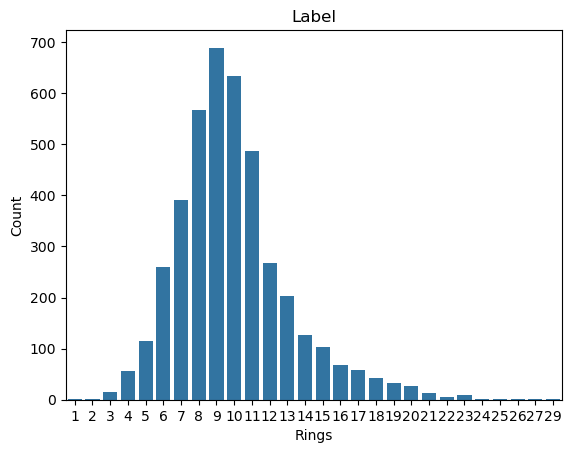

In [129]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Label")

In [130]:
df['Rings'].value_counts().sort_index()

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64

In [131]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [132]:
total_count = len(df)
q1_count = total_count * 0.33
q2_count = total_count * 0.66

cumulative = df['Rings'].value_counts().sort_index().cumsum()
q1_rings = cumulative[cumulative >= q1_count].index[0]
q2_rings = cumulative[cumulative >= q2_count].index[0]
print(q1_rings, q2_rings)

8 11


In [133]:
bins = [0, q1_rings, q2_rings, 30]
df['Rings'] = pd.cut(df['Rings'], bins=bins, right=True).cat.codes
df['Rings']

id
0       2
1       0
2       1
3       1
4       0
       ..
4172    1
4173    1
4174    1
4175    1
4176    2
Name: Rings, Length: 4177, dtype: int8

In [134]:
df['Rings'].value_counts().sort_index()

Rings
0    1407
1    1810
2     960
Name: count, dtype: int64

In [135]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [136]:
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex')
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1,False,False,True


In [137]:
correlation_matrix = df.corr()
print(correlation_matrix)

                  Length  Diameter    Height  Whole_weight  Shucked_weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole_weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked_weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera_weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell_weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.549238  0.566534  0.542407      0.545434        0.445484   
Sex_F           0.309666  0.318626  0.298421      0.299741        0.263991   
Sex_I          -0.551465 -0.564315 -0.518552     -0.557592       -0.521842   
Sex_M           0.236543  0.240376  0.215459      0.252038        0.251793   

                Viscera_weight  Shell_weight     Rings     Sex_

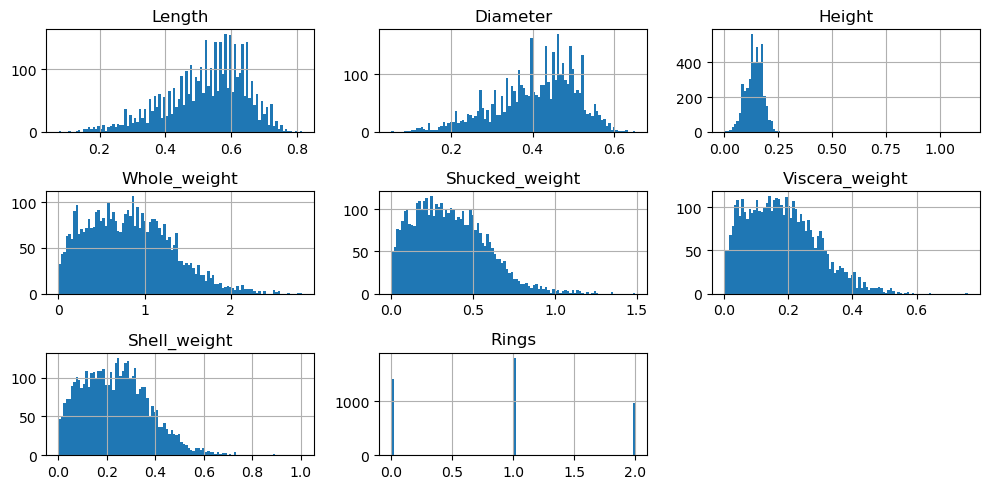

In [138]:
df.hist(bins=100, figsize=(10, 5))
plt.tight_layout()
plt.show()

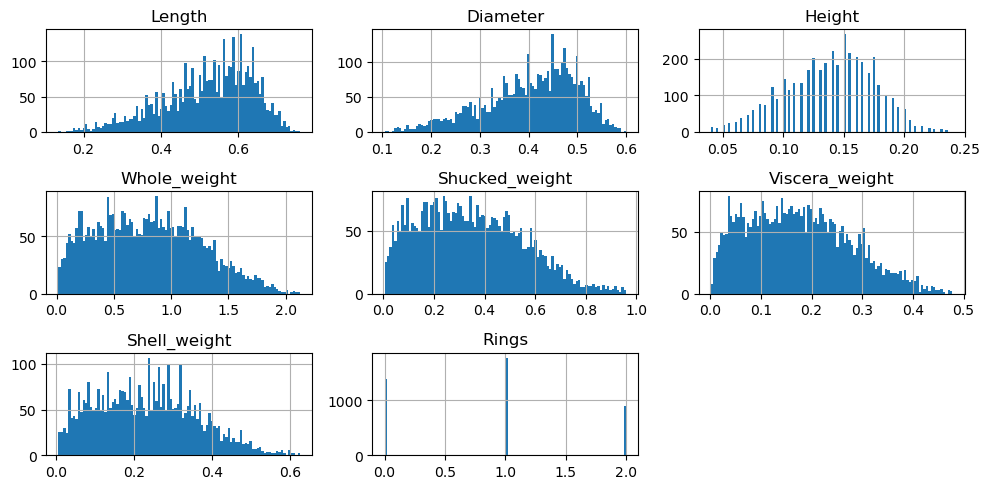

In [139]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df

columns_to_check = ['Height', 'Shell_weight', 'Shucked_weight', 'Viscera_weight', 'Whole_weight']
df = remove_outliers(df, columns_to_check)

df.hist(bins=100, figsize=(10, 5))
plt.tight_layout()
plt.show()

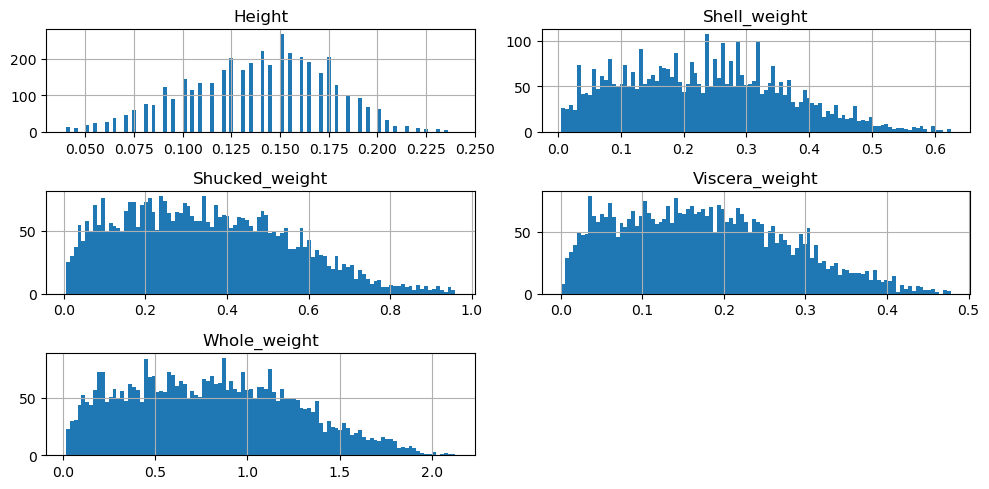

In [140]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = df[columns_to_check]
X.hist(bins=100, figsize=(10, 5))
plt.tight_layout()
plt.show()

In [141]:
from sklearn.preprocessing import MinMaxScaler
y = df['Rings']    
y

id
0       2
1       0
2       1
3       1
4       0
       ..
4172    1
4173    1
4174    1
4175    1
4176    2
Name: Rings, Length: 4056, dtype: int8

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### SVM 분류

In [150]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)
pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))


--- SVM Classifier ---
0.685404339250493


### LR 분류

In [151]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.6794871794871795


### KNN 분류

In [152]:
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)
pred_knn = clf_knn.predict(X_test)
print("\n--- KNN Classifier ---")
print(accuracy_score(y_test, pred_knn))


--- KNN Classifier ---
0.645956607495069


### DT 분류

In [153]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)
pred_dt = clf_dt.predict(X_test)
print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))


--- Decision Tree Classifier ---
0.5976331360946746


### RF 분류

In [154]:
print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))


--- Radom Forest ---
0.6696252465483234


## 딥러닝 분류

In [162]:
y=df['Rings']
y.value_counts().sort_index()

Rings
0    1383
1    1773
2     900
Name: count, dtype: int64

In [163]:
y=df['Rings']
Y = pd.get_dummies(y).values
Y

array([[False, False,  True],
       [ True, False, False],
       [False,  True, False],
       ...,
       [False,  True, False],
       [False,  True, False],
       [False, False,  True]])

In [164]:
X = df[columns_to_check]
X = X.values
X

array([[0.095 , 0.15  , 0.2245, 0.101 , 0.514 ],
       [0.09  , 0.07  , 0.0995, 0.0485, 0.2255],
       [0.135 , 0.21  , 0.2565, 0.1415, 0.677 ],
       ...,
       [0.205 , 0.308 , 0.5255, 0.2875, 1.176 ],
       [0.15  , 0.296 , 0.531 , 0.261 , 1.0945],
       [0.195 , 0.495 , 0.9455, 0.3765, 1.9485]])

In [165]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [170]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

# 다중 클래스: softmax + categorical_crossentropy
# 이진 클래스: sigmoid + binary_crossentropy
model = Sequential()
model.add(Dense(10, input_shape=(5,), activation='relu')) 
model.add(Dense(8, activation='relu')) 
model.add(Dense(6, activation='relu')) 
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                60        
                                                                 
 dense_25 (Dense)            (None, 8)                 88        
                                                                 
 dense_26 (Dense)            (None, 6)                 54        
                                                                 
 dense_27 (Dense)            (None, 3)                 21        
                                                                 
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________


In [171]:
model_history=model.fit(x=X_train, y=y_train, epochs=40, batch_size=30, validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/40
109/109 [==============================] - 1s 3ms/step - loss: 1.0856 - accuracy: 0.4362 - val_loss: 1.0826 - val_accuracy: 0.4261
Epoch 2/40
109/109 [==============================] - 0s 2ms/step - loss: 1.0775 - accuracy: 0.4399 - val_loss: 1.0755 - val_accuracy: 0.4261
Epoch 3/40
109/109 [==============================] - 0s 2ms/step - loss: 1.0694 - accuracy: 0.4399 - val_loss: 1.0683 - val_accuracy: 0.4261
Epoch 4/40
109/109 [==============================] - 0s 1ms/step - loss: 1.0609 - accuracy: 0.4399 - val_loss: 1.0605 - val_accuracy: 0.4261
Epoch 5/40
109/109 [==============================] - 0s 1ms/step - loss: 1.0522 - accuracy: 0.4399 - val_loss: 1.0531 - val_accuracy: 0.4261
Epoch 6/40
109/109 [==============================] - 0s 2ms/step - loss: 1.0444 - accuracy: 0.4399 - val_loss: 1.0464 - val_accuracy: 0.4261
Epoch 7/40
109/109 [==============================] - 0s 4ms/step - loss: 1.0370 - accuracy: 0.4399 - val_loss: 1.0400 - val_accuracy: 0.4261
Epoch 

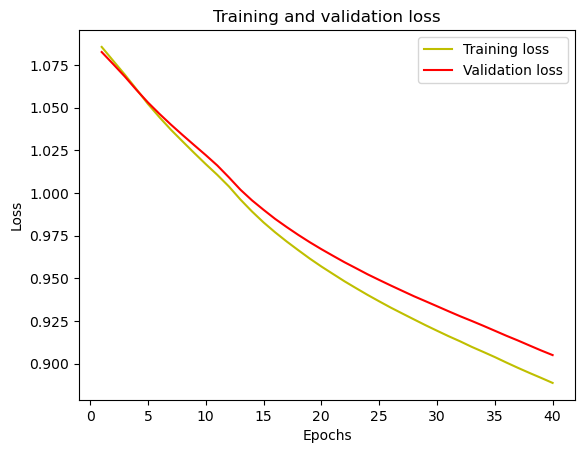

In [172]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

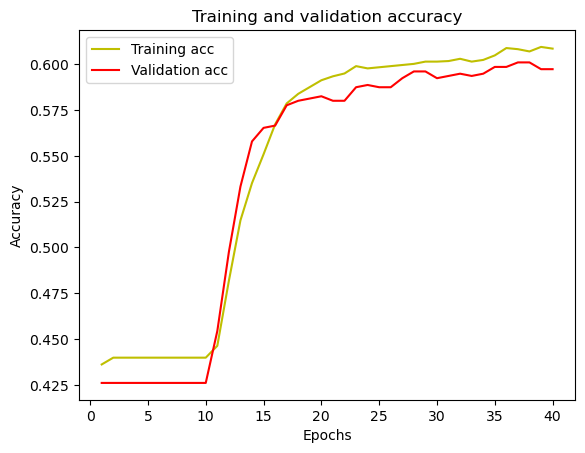

In [173]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [174]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       278
           1       0.54      0.80      0.65       346
           2       0.00      0.00      0.00       188

    accuracy                           0.60       812
   macro avg       0.41      0.52      0.46       812
weighted avg       0.47      0.60      0.52       812

[[208  70   0]
 [ 69 277   0]
 [ 23 165   0]]


## 머신러닝 회귀

In [216]:
df = pd.read_csv("datas/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


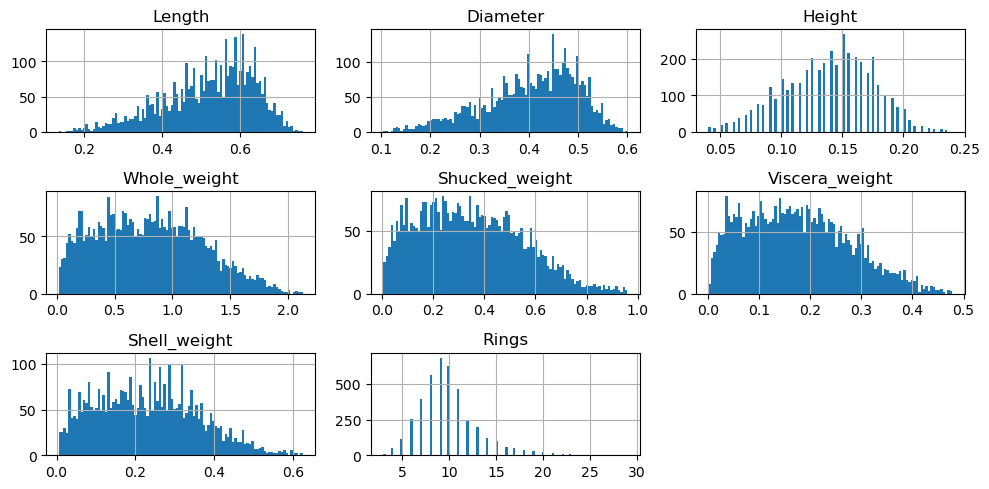

In [217]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df

columns_to_check = ['Height', 'Shell_weight', 'Shucked_weight', 'Viscera_weight', 'Whole_weight']
df = remove_outliers(df, columns_to_check)

df.hist(bins=100, figsize=(10, 5))
plt.tight_layout()
plt.show()

In [218]:
X = df[columns_to_check]
X.head()

,Height,Shell_weight,Shucked_weight,Viscera_weight,Whole_weight
id,,,,,
0,0.095,0.150,0.2245,0.1010,0.5140
1,0.090,0.070,0.0995,0.0485,0.2255
2,0.135,0.210,0.2565,0.1415,0.6770
3,0.125,0.155,0.2155,0.1140,0.5160
4,0.080,0.055,0.0895,0.0395,0.2050


In [219]:
y = df['Rings']
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [220]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,shuffle=True,random_state=12)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)


### Linear 회귀

In [221]:
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)
def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error
    
print('평균제곱근오차', mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse_np(ly_preds, y_test))
print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 4.739690068697761
평균제곱근오차 4.739690068697761
평균제곱근오차 4.739690068697763


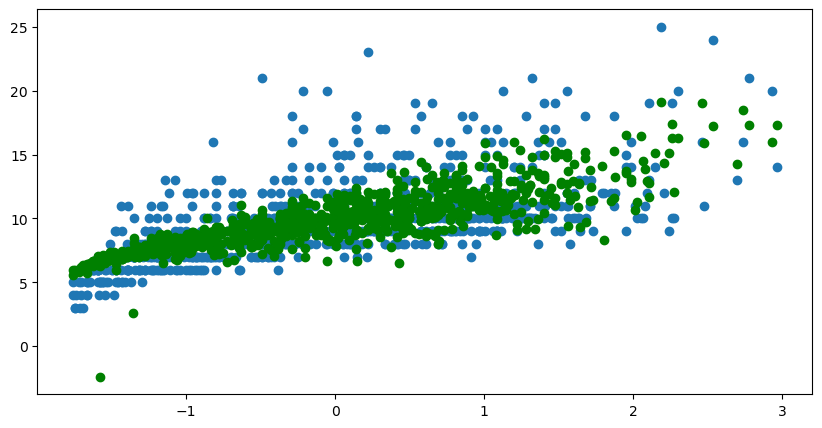

In [222]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ly_preds, c='g', label='ly_preds')
plt.show()   

### Decision Tree 회귀

In [223]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 8.992610837438423


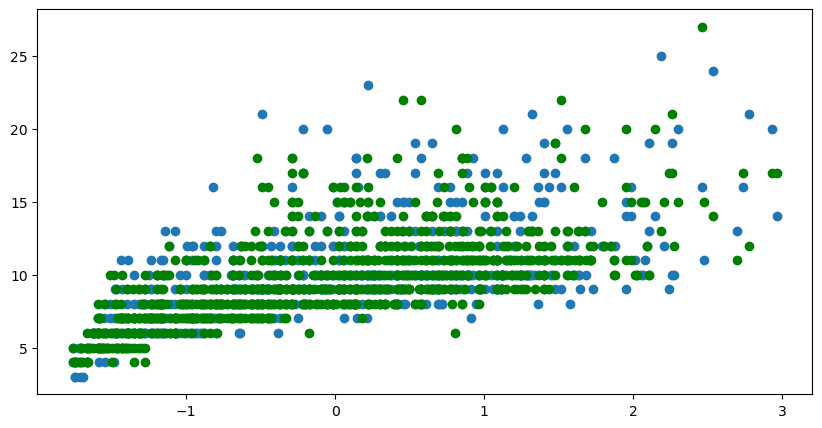

In [224]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], dy_preds, c='g', label='dy_preds')
plt.show()   

### Random Forest 회귀

In [225]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 5.074948399014778


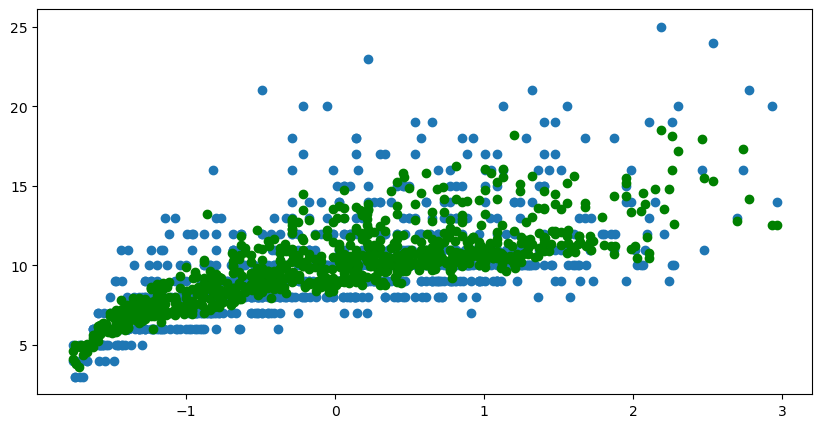

In [226]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ry_preds, c='g', label='ry_preds')
plt.show()  

### SVR 회귀

In [227]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)
ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 4.932193528034428


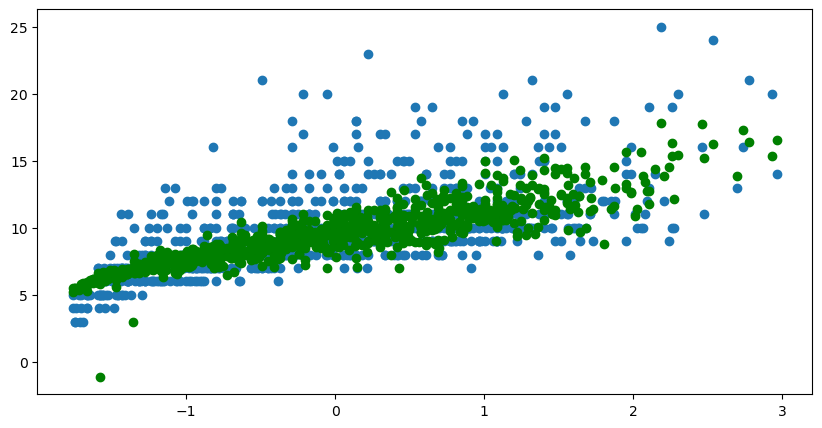

In [228]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ry_preds, c='g', label='ly_preds')
plt.show()  

## 딥러닝 회귀

In [229]:
Y = pd.get_dummies(y).values
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [230]:
X = X.values
X

array([[0.095 , 0.15  , 0.2245, 0.101 , 0.514 ],
       [0.09  , 0.07  , 0.0995, 0.0485, 0.2255],
       [0.135 , 0.21  , 0.2565, 0.1415, 0.677 ],
       ...,
       [0.205 , 0.308 , 0.5255, 0.2875, 1.176 ],
       [0.15  , 0.296 , 0.531 , 0.261 , 1.0945],
       [0.195 , 0.495 , 0.9455, 0.3765, 1.9485]])

In [232]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [233]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(10,input_shape=(5,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                60        
                                                                 
 dense_29 (Dense)            (None, 30)                330       
                                                                 
 dense_30 (Dense)            (None, 30)                930       
                                                                 
 dense_31 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________


In [234]:
N_EPOCHS = 20
history=model.fit(x=X_train, y=y_train, epochs=20, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/20
102/102 [==============================] - 1s 3ms/step - loss: 0.0406 - mse: 0.0406 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 2/20
102/102 [==============================] - 0s 1ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0386 - val_mse: 0.0386
Epoch 3/20
102/102 [==============================] - 0s 1ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0373 - val_mse: 0.0373
Epoch 4/20
102/102 [==============================] - 0s 1ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0390 - val_mse: 0.0390
Epoch 5/20
102/102 [==============================] - 0s 1ms/step - loss: 0.0375 - mse: 0.0375 - val_loss: 0.0370 - val_mse: 0.0370
Epoch 6/20
102/102 [==============================] - 0s 1ms/step - loss: 0.0373 - mse: 0.0373 - val_loss: 0.0372 - val_mse: 0.0372
Epoch 7/20
102/102 [==============================] - 0s 2ms/step - loss: 0.0372 - mse: 0.0372 - val_loss: 0.0370 - val_mse: 0.0370
Epoch 8/20
102/102 [==============================] - 0s 2ms/step - loss: 0.

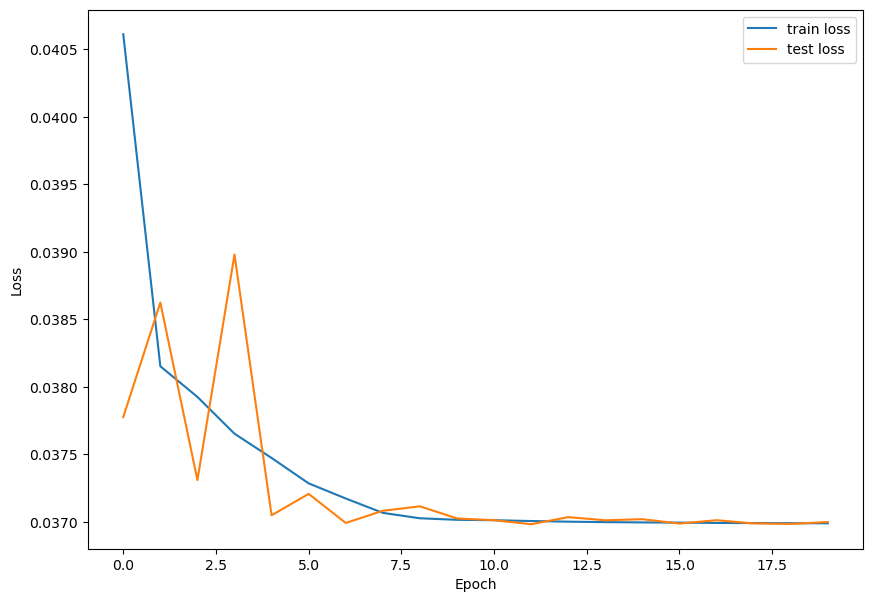

In [235]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [236]:
model.evaluate(X_test, y_test)

26/26 [==============================] - 0s 987us/step - loss: 0.0370 - mse: 0.0370


[0.036999329924583435, 0.036999329924583435]